## Setup

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Exploring data

In [200]:
df = pd.read_csv('../../data/processed/data.csv')
df.sample(10)

,name,genre,tomatometer_score,tomatometer_count,audience_score,audience_count,classification,runtime,release_year,original_language
947,The Dark Knight,Action,0.94,346.0,0.94,250000.0,PG-13,152.0,2008,English
161,Fifty Shades Darker,Romance,0.11,209.0,0.47,25000.0,R,118.0,2017,English
557,It,Horror,0.86,388.0,0.84,50000.0,R,135.0,2017,English
899,Beautiful Disaster,Romance,0.29,7.0,0.54,500.0,R,96.0,2023,English
1183,Annie,Kids & family,0.29,161.0,0.59,50000.0,PG,118.0,2014,English
958,The Jester,Horror,0.29,7.0,0.35,50.0,Not Rated,90.0,2023,English
4,1917,War,0.89,472.0,0.88,25000.0,R,119.0,2019,English
1025,Godzilla: King of the Monsters,Sci-fi,0.42,353.0,0.83,25000.0,PG-13,132.0,2019,English
793,Home for the Holidays,Holiday,0.64,50.0,0.72,10000.0,PG-13,103.0,1995,English
37,White Men Can't Jump,Comedy,0.26,88.0,0.60,500.0,R,101.0,2023,English


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1215 non-null   object 
 1   genre              1215 non-null   object 
 2   tomatometer_score  1162 non-null   float64
 3   tomatometer_count  1208 non-null   float64
 4   audience_score     1192 non-null   float64
 5   audience_count     1192 non-null   float64
 6   classification     1215 non-null   object 
 7   runtime            1210 non-null   float64
 8   release_year       1215 non-null   int64  
 9   original_language  1215 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 95.1+ KB


**Question**: For each genre, what would the correlation between tomatometer score and audience be ? 

**Purpose**: To see if there are any genres that are fit for both critics and audience.

### Prepare data for exploration

We need to find the missing ration for tomato meter and audience score. 

In [202]:
tomato_missing = df["tomatometer_score"].isna().sum() / len(df)
audience_missing = df["audience_score"].isna().sum() / len(df)
print(f"Tomatometer missing: {tomato_missing:.2%}")
print(f"Audience missing: {audience_missing:.2%}")

Tomatometer missing: 4.36%
Audience missing: 1.89%


These values are not too big, so we can fill them with the mean of the column.

In [203]:
df["tomatometer_score"].fillna(df["tomatometer_score"].mean(), inplace=True)
df["audience_score"].fillna(df["audience_score"].mean(), inplace=True)

In [204]:
genres = np.unique(df['genre'])
print(f'Number of genres: {len(genres)}')
print(f'Genres: {genres}')

Number of genres: 21
Genres: ['Action' 'Adventure' 'Anime' 'Biography' 'Comedy' 'Crime' 'Documentary'
 'Drama' 'Fantasy' 'Game show' 'History' 'Holiday' 'Horror'
 'Kids & family' 'Music' 'Musical' 'Mystery & thriller' 'Romance' 'Sci-fi'
 'War' 'Western']


We see that there are 21 genres in total and there are 2 genres that are related to each other. They are "Music" and "Musical". In this case, we really don't need to have both of them. So, we will combine them into one genre called "Music/Musical".

In [205]:
df['genre'] = df['genre'].replace(["Music", "Musical"], "Music/ Musical")
genres = np.unique(df['genre'])


Now, we need to count the number of movies in each genre. We will use this information to see if there are any genres that should be removed from the dataset.

In [206]:
for genre in genres:
    print(f'Number of {genre} movies: {len(df[df["genre"] == genre])}')

Number of Action movies: 107
Number of Adventure movies: 22
Number of Anime movies: 2
Number of Biography movies: 71
Number of Comedy movies: 107
Number of Crime movies: 45
Number of Documentary movies: 95
Number of Drama movies: 68
Number of Fantasy movies: 30
Number of Game show movies: 1
Number of History movies: 42
Number of Holiday movies: 75
Number of Horror movies: 79
Number of Kids & family movies: 155
Number of Music/ Musical movies: 42
Number of Mystery & thriller movies: 67
Number of Romance movies: 60
Number of Sci-fi movies: 73
Number of War movies: 36
Number of Western movies: 38


We see that there are 2 genres that have less than 10 movies. They are "Anime" and "Game show". We will not consider these genres in our analysis.

In [207]:
genres = np.delete(genres, np.where((genres == "Anime") | (genres == "Game show")))
print(genres)

['Action' 'Adventure' 'Biography' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Fantasy' 'History' 'Holiday' 'Horror' 'Kids & family' 'Music/ Musical'
 'Mystery & thriller' 'Romance' 'Sci-fi' 'War' 'Western']


Next, we create a dataframe that contains the correlation between tomatometer score and audience score for each genre. We will use this dataframe to create a bar chart.

In [208]:
df_genre = pd.DataFrame(columns=['Correlation'], index=genres)
for genre in genres:
    df_genre.loc[genre] = df[df['genre'] == genre]['tomatometer_score'].corr(df[df['genre'] == genre]['audience_score'])
df_genre.sort_values(by=['Correlation'], inplace=True)
df_genre

,Correlation
Adventure,-0.009375
Drama,0.339137
Horror,0.35832
Documentary,0.364369
Biography,0.397751
Comedy,0.447956
Romance,0.465817
War,0.494754
History,0.530546
Holiday,0.537941


[Text(0, 0, 'Adventure'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Horror'),
 Text(3, 0, 'Documentary'),
 Text(4, 0, 'Biography'),
 Text(5, 0, 'Comedy'),
 Text(6, 0, 'Romance'),
 Text(7, 0, 'War'),
 Text(8, 0, 'History'),
 Text(9, 0, 'Holiday'),
 Text(10, 0, 'Sci-fi'),
 Text(11, 0, 'Western'),
 Text(12, 0, 'Action'),
 Text(13, 0, 'Crime'),
 Text(14, 0, 'Fantasy'),
 Text(15, 0, 'Mystery & thriller'),
 Text(16, 0, 'Kids & family'),
 Text(17, 0, 'Music/ Musical')]

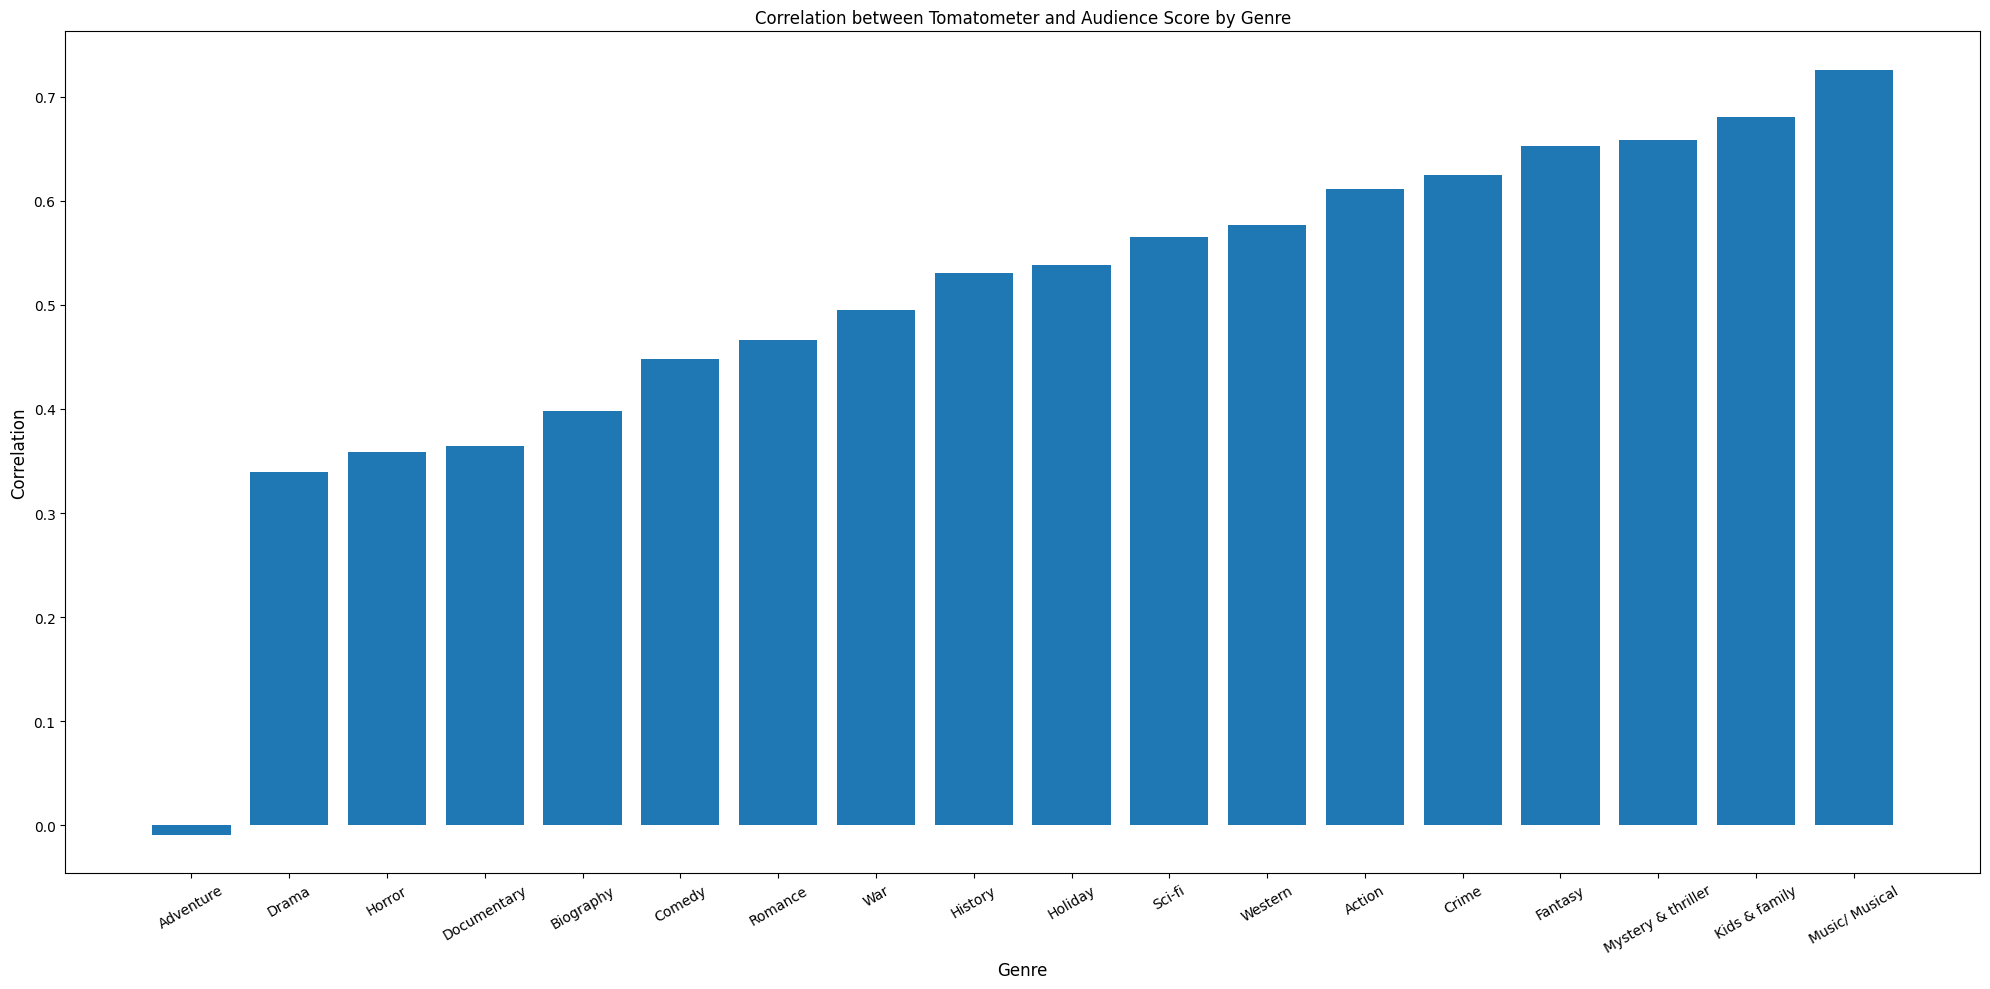

In [209]:
fig, ax = plt.subplots(figsize=(20, 10), tight_layout=True)

ax.bar(df_genre.index, df_genre['Correlation'])
ax.set_title('Correlation between Tomatometer and Audience Score by Genre')
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Correlation', fontsize=12)
ax.set_xticklabels(df_genre.index, rotation=30)

**Insight**: The genre that has the highest correlation between tomatometer score and audience score is "Music/ Musical". The genre that has the lowest correlation between tomatometer score and audience score is "Adventure". Apart from these two genres, the rest of the genres have a correlation lies between 0.3 and 0.7, which can be considered as a moderate correlation. Only the "Adventure" genre has a negative correlation. 

**Why Music/Musical has the highest correlation?**
- Musicals allow for a wide range of emotions to be conveyed through song and dance. This can be a powerful way to connect with an audience and create an immersive experience. 
- Musicals often tell stories that are both entertaining and relatable, making them easy to enjoy. 
- The music in musicals is often catchy and memorable, making them enjoyable to listen to even after the show is over.

**Why Adventure has the lowest correlation?**
- While adventure movies are often exciting and fun to watch, they can also be quite predictable, which makes them less engaging for critics. 
- Audiences tend to enjoy adventure movies more than critics because they are less concerned with the plot and more interested in the action and adventure.
- Critics are often more interested in the plot and character development, which is not a strong point for adventure movies. 